In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

### 데이터 확인

In [2]:
# 데이터를 읽어온다.
df1 = pd.read_csv('./data/NBA2028.csv')
df1

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Arena,Notes
0,"Tue, Oct 17, 2017",8:01p,Boston Celtics,99,Cleveland Cavaliers,102,Box Score,NaN,20562,Quicken Loans Arena,NaN
1,"Tue, Oct 17, 2017",10:30p,Houston Rockets,122,Golden State Warriors,121,Box Score,NaN,19596,Oracle Arena,NaN
2,"Wed, Oct 18, 2017",7:00p,Charlotte Hornets,90,Detroit Pistons,102,Box Score,NaN,20491,Little Caesars Arena,NaN
3,"Wed, Oct 18, 2017",7:00p,Brooklyn Nets,131,Indiana Pacers,140,Box Score,NaN,15008,Bankers Life Fieldhouse,NaN
4,"Wed, Oct 18, 2017",7:00p,Miami Heat,109,Orlando Magic,116,Box Score,NaN,18846,Amway Center,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1308,"Mon, May 28, 2018",9:00p,Golden State Warriors,101,Houston Rockets,92,Box Score,NaN,18055,Toyota Center,NaN
1309,"Thu, May 31, 2018",9:00p,Cleveland Cavaliers,114,Golden State Warriors,124,Box Score,OT,19596,Oracle Arena,NaN
1310,"Sun, Jun 3, 2018",8:00p,Cleveland Cavaliers,103,Golden State Warriors,122,Box Score,NaN,19596,Oracle Arena,NaN
1311,"Wed, Jun 6, 2018",9:00p,Golden State Warriors,110,Cleveland Cavaliers,102,Box Score,NaN,20562,Quicken Loans Arena,NaN


In [3]:
# 컬럼 이름 확인
df1.columns

Index(['Date', 'Start (ET)', 'Visitor/Neutral', 'PTS', 'Home/Neutral', 'PTS.1',
       'Unnamed: 6', 'Unnamed: 7', 'Attend.', 'Arena', 'Notes'],
      dtype='object')

In [4]:
# 컬럼명을 변경한다.
df1.columns = ['경기날짜' , '경기시간', '방문팀이름', '방문팀점수', '홈팀이름', '홈팀점수', 'BoxScore', '연장전', '관객수', '경기장', 'Note']
df1

,경기날짜,경기시간,방문팀이름,방문팀점수,홈팀이름,홈팀점수,BoxScore,연장전,관객수,경기장,Note
0,"Tue, Oct 17, 2017",8:01p,Boston Celtics,99,Cleveland Cavaliers,102,Box Score,NaN,20562,Quicken Loans Arena,NaN
1,"Tue, Oct 17, 2017",10:30p,Houston Rockets,122,Golden State Warriors,121,Box Score,NaN,19596,Oracle Arena,NaN
2,"Wed, Oct 18, 2017",7:00p,Charlotte Hornets,90,Detroit Pistons,102,Box Score,NaN,20491,Little Caesars Arena,NaN
3,"Wed, Oct 18, 2017",7:00p,Brooklyn Nets,131,Indiana Pacers,140,Box Score,NaN,15008,Bankers Life Fieldhouse,NaN
4,"Wed, Oct 18, 2017",7:00p,Miami Heat,109,Orlando Magic,116,Box Score,NaN,18846,Amway Center,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1308,"Mon, May 28, 2018",9:00p,Golden State Warriors,101,Houston Rockets,92,Box Score,NaN,18055,Toyota Center,NaN
1309,"Thu, May 31, 2018",9:00p,Cleveland Cavaliers,114,Golden State Warriors,124,Box Score,OT,19596,Oracle Arena,NaN
1310,"Sun, Jun 3, 2018",8:00p,Cleveland Cavaliers,103,Golden State Warriors,122,Box Score,NaN,19596,Oracle Arena,NaN
1311,"Wed, Jun 6, 2018",9:00p,Golden State Warriors,110,Cleveland Cavaliers,102,Box Score,NaN,20562,Quicken Loans Arena,NaN


In [5]:
# BoxScore, Note 제거
df1.drop(['BoxScore', 'Note'], inplace=True, axis=1)
df1

,경기날짜,경기시간,방문팀이름,방문팀점수,홈팀이름,홈팀점수,연장전,관객수,경기장
0,"Tue, Oct 17, 2017",8:01p,Boston Celtics,99,Cleveland Cavaliers,102,NaN,20562,Quicken Loans Arena
1,"Tue, Oct 17, 2017",10:30p,Houston Rockets,122,Golden State Warriors,121,NaN,19596,Oracle Arena
2,"Wed, Oct 18, 2017",7:00p,Charlotte Hornets,90,Detroit Pistons,102,NaN,20491,Little Caesars Arena
3,"Wed, Oct 18, 2017",7:00p,Brooklyn Nets,131,Indiana Pacers,140,NaN,15008,Bankers Life Fieldhouse
4,"Wed, Oct 18, 2017",7:00p,Miami Heat,109,Orlando Magic,116,NaN,18846,Amway Center
...,...,...,...,...,...,...,...,...,...
1308,"Mon, May 28, 2018",9:00p,Golden State Warriors,101,Houston Rockets,92,NaN,18055,Toyota Center
1309,"Thu, May 31, 2018",9:00p,Cleveland Cavaliers,114,Golden State Warriors,124,OT,19596,Oracle Arena
1310,"Sun, Jun 3, 2018",8:00p,Cleveland Cavaliers,103,Golden State Warriors,122,NaN,19596,Oracle Arena
1311,"Wed, Jun 6, 2018",9:00p,Golden State Warriors,110,Cleveland Cavaliers,102,NaN,20562,Quicken Loans Arena


In [6]:
# 결측치 확인
df1.isna().sum()

경기날짜        0
경기시간        0
방문팀이름       0
방문팀점수       0
홈팀이름        0
홈팀점수        0
연장전      1247
관객수         0
경기장         0
dtype: int64

In [7]:
# 연장전의 결측치는 NOT으로 채워준다.
df1['연장전'].fillna('NOT', inplace=True)
df1.isna().sum()

경기날짜     0
경기시간     0
방문팀이름    0
방문팀점수    0
홈팀이름     0
홈팀점수     0
연장전      0
관객수      0
경기장      0
dtype: int64

- 연장전이 치뤄진 경기의 수를 출력하세요.
- 각 경기장별로 치뤄진 경기 수에 대해 시각화 하세요.
- 점수차이가 20점 이상 차이가 난 경기의 수를 출력하세요.
- 관객수가 20000명 이상인 경기의 수를 출력하세요.

### 연장전이 치뤄진 경기의 수를 출력하세요.

In [8]:
OT_list = df1['연장전'].value_counts().values
OT_list.sum()-OT_list[0]

66

-------------

In [9]:
# 연장전 확인
df1['연장전'].value_counts()

NOT         1247
OT            58
2OT            6
3OT            1
Playoffs       1
Name: 연장전, dtype: int64

In [10]:
# 연장전 컬럼이 NOT이 아닌 것을 가져온다.
a1 = df1.query('연장전 != "NOT"')
a1

,경기날짜,경기시간,방문팀이름,방문팀점수,홈팀이름,홈팀점수,연장전,관객수,경기장
63,"Wed, Oct 25, 2017",10:30p,Washington Wizards,99,Los Angeles Lakers,102,OT,18996,STAPLES Center
92,"Mon, Oct 30, 2017",7:30p,Minnesota Timberwolves,125,Miami Heat,122,OT,19600,AmericanAirlines Arena
114,"Wed, Nov 1, 2017",9:00p,Portland Trail Blazers,103,Utah Jazz,112,OT,16685,Vivint Smart Home Arena
132,"Sat, Nov 4, 2017",8:00p,New Orleans Pelicans,96,Chicago Bulls,90,OT,21254,United Center
219,"Fri, Nov 17, 2017",7:30p,Los Angeles Clippers,113,Cleveland Cavaliers,118,OT,20562,Quicken Loans Arena
...,...,...,...,...,...,...,...,...,...
1230,Playoffs,Playoffs,Playoffs,Playoffs,Playoffs,Playoffs,Playoffs,Playoffs,Playoffs
1235,"Sun, Apr 15, 2018",1:00p,Milwaukee Bucks,107,Boston Celtics,113,OT,18624,TD Garden
1279,"Tue, May 1, 2018",8:00p,Cleveland Cavaliers,113,Toronto Raptors,112,OT,19954,Air Canada Centre
1286,"Sat, May 5, 2018",5:00p,Boston Celtics,101,Philadelphia 76ers,98,OT,20758,Wells Fargo Center


In [11]:
# 개수를 구한다.
a2 = a1['연장전'].count()
print(f'연장전이 치뤄진 경기 수 : {a2}')

연장전이 치뤄진 경기 수 : 66


### 각 경기장별로 치뤄진 경기 수에 대해 시각화 하세요.

In [12]:
df1['경기장'].value_counts()

STAPLES Center                82
Quicken Loans Arena           52
TD Garden                     52
Oracle Arena                  52
Toyota Center                 51
Air Canada Centre             46
Vivint Smart Home Arena       46
Wells Fargo Center            45
Smoothie King Center          45
Bankers Life Fieldhouse       44
Capital One Arena             44
Chesapeake Energy Arena       44
BMO Harris Bradley Center     43
AT&T Center                   43
AmericanAirlines Arena        43
Moda Center                   43
Target Center                 43
Madison Square Garden (IV)    41
Pepsi Center                  41
Philips Arena                 41
United Center                 41
Spectrum Center               41
Golden 1 Center               41
Talking Stick Resort Arena    41
American Airlines Center      41
FedEx Forum                   41
Amway Center                  41
Little Caesars Arena          41
Barclays Center               39
Mexico City Arena              2
UW–Milwauk

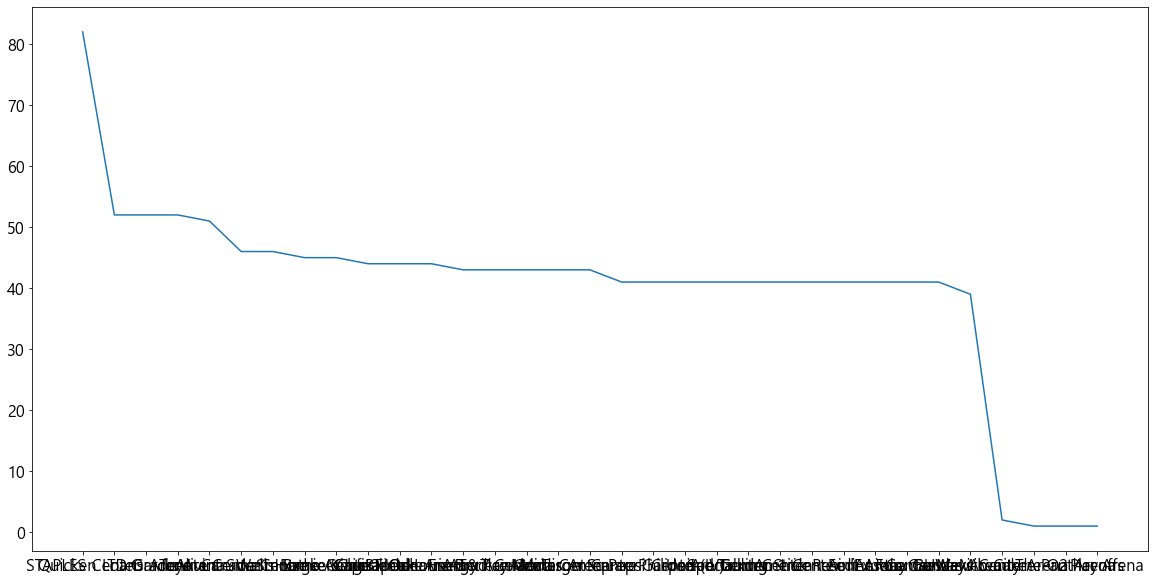

In [13]:
plt.plot(df1['경기장'].value_counts())
plt.show()

---

In [14]:
a1 = df1.groupby('경기장')['경기날짜'].count()
a1

경기장
AT&T Center                   43
Air Canada Centre             46
American Airlines Center      41
AmericanAirlines Arena        43
Amway Center                  41
BMO Harris Bradley Center     43
Bankers Life Fieldhouse       44
Barclays Center               39
Capital One Arena             44
Chesapeake Energy Arena       44
FedEx Forum                   41
Golden 1 Center               41
Little Caesars Arena          41
Madison Square Garden (IV)    41
Mexico City Arena              2
Moda Center                   43
Oracle Arena                  52
Pepsi Center                  41
Philips Arena                 41
Playoffs                       1
Quicken Loans Arena           52
STAPLES Center                82
Smoothie King Center          45
Spectrum Center               41
TD Garden                     52
Talking Stick Resort Arena    41
Target Center                 43
The O2 Arena                   1
Toyota Center                 51
UW–Milwaukee Panther Arena     1
United

In [15]:
a2 = df1[['경기장', '경기날짜']].groupby('경기장').count()
a2

,경기날짜
경기장,
AT&T Center,43
Air Canada Centre,46
American Airlines Center,41
AmericanAirlines Arena,43
Amway Center,41
BMO Harris Bradley Center,43
Bankers Life Fieldhouse,44
Barclays Center,39
Capital One Arena,44


In [16]:
# 경기수 별로 정렬한다.
a1.sort_values(inplace=True, ascending=False)
a2.sort_values(by='경기날짜', inplace=True, ascending=False)

display(a1)
display(a2)

경기장
STAPLES Center                82
Oracle Arena                  52
TD Garden                     52
Quicken Loans Arena           52
Toyota Center                 51
Air Canada Centre             46
Vivint Smart Home Arena       46
Smoothie King Center          45
Wells Fargo Center            45
Chesapeake Energy Arena       44
Capital One Arena             44
Bankers Life Fieldhouse       44
BMO Harris Bradley Center     43
Target Center                 43
AmericanAirlines Arena        43
AT&T Center                   43
Moda Center                   43
Golden 1 Center               41
Spectrum Center               41
American Airlines Center      41
United Center                 41
Talking Stick Resort Arena    41
Pepsi Center                  41
Amway Center                  41
Madison Square Garden (IV)    41
FedEx Forum                   41
Philips Arena                 41
Little Caesars Arena          41
Barclays Center               39
Mexico City Arena              2
The O2

,경기날짜
경기장,
STAPLES Center,82
Oracle Arena,52
TD Garden,52
Quicken Loans Arena,52
Toyota Center,51
Air Canada Centre,46
Vivint Smart Home Arena,46
Smoothie King Center,45
Wells Fargo Center,45


In [17]:
# 막대 그래프를 그린다.
# 인덱스를 컬럼에 포함시킨다.
a3 = a2.reset_index()
a3

,경기장,경기날짜
0,STAPLES Center,82
1,Oracle Arena,52
2,TD Garden,52
3,Quicken Loans Arena,52
4,Toyota Center,51
5,Air Canada Centre,46
6,Vivint Smart Home Arena,46
7,Smoothie King Center,45
8,Wells Fargo Center,45
9,Chesapeake Energy Arena,44


In [18]:
# 컬럼 이름을 변경한다.
a3.columns = ['경기장','경기수']
a3

,경기장,경기수
0,STAPLES Center,82
1,Oracle Arena,52
2,TD Garden,52
3,Quicken Loans Arena,52
4,Toyota Center,51
5,Air Canada Centre,46
6,Vivint Smart Home Arena,46
7,Smoothie King Center,45
8,Wells Fargo Center,45
9,Chesapeake Energy Arena,44


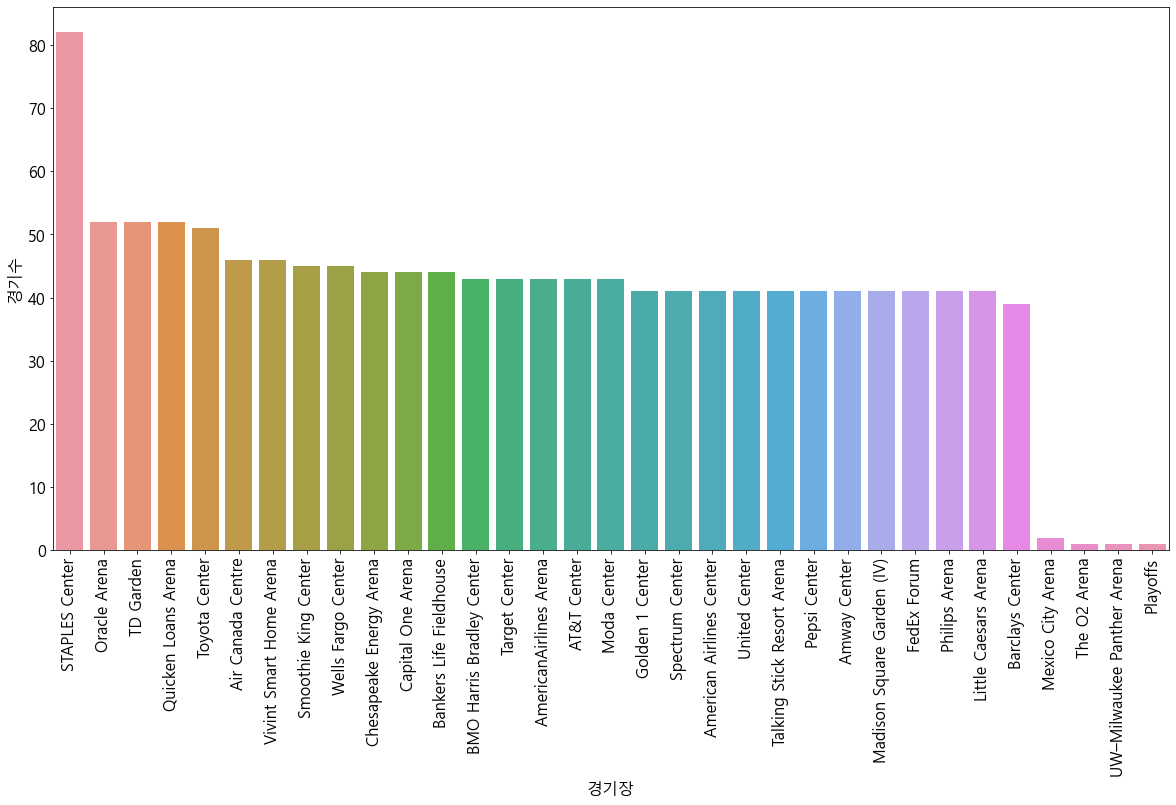

In [19]:
# 막대그래프를 그린다.
sns.barplot(data=a3, x='경기장', y='경기수')
plt.xticks(rotation=90)
plt.show()

### 점수차이가 20점 이상 차이가 난 경기의 수를 출력하세요.

In [20]:
df1['홈팀점수'] = df1['홈팀점수'].astype('int64')

ValueError: invalid literal for int() with base 10: 'Playoffs'

In [21]:
# Playoffs 라고 저장되어있는 행을 제거한다.
df2= df1.copy()
idx1 = df2.query('방문팀점수 == "Playoffs"').index
df2.drop(idx1, inplace=True)

idx2 = df2.query('홈팀점수 == "Playoffs"').index
df2.drop(idx2, inplace=True)

In [22]:
df2['방문팀점수'] = df2['방문팀점수'].astype('int64')
df2['홈팀점수'] = df2['홈팀점수'].astype('int64')

In [23]:
# 방문팀에서 홈팀을 빼준다.
a1 = df2['방문팀점수'] - df2['홈팀점수']
a1

0       -3
1        1
2      -12
3       -9
4       -7
        ..
1308     9
1309   -10
1310   -19
1311     8
1312    23
Length: 1312, dtype: int64

In [24]:
# 절대값을 구한다.
a2 = abs(a1)
a2

0        3
1        1
2       12
3        9
4        7
        ..
1308     9
1309    10
1310    19
1311     8
1312    23
Length: 1312, dtype: int64

In [25]:
# 점수차가 20 이상인 것만 가져온다.
a3 = a2[a2 >= 20]
a3

11      48
14      21
26      34
28      21
36      42
        ..
1298    22
1299    30
1300    41
1306    29
1312    23
Length: 184, dtype: int64

In [26]:
a3.count()
print(f'경기차가 20점 이상인 경기수 : {len(a3)}')

경기차가 20점 이상인 경기수 : 184


In [27]:
# 관객수가 20000명 이상인 경기의 수를 출력하세요
a1 = df1.query('관객수 >= "20000"')
a1

,경기날짜,경기시간,방문팀이름,방문팀점수,홈팀이름,홈팀점수,연장전,관객수,경기장
0,"Tue, Oct 17, 2017",8:01p,Boston Celtics,99,Cleveland Cavaliers,102,NOT,20562,Quicken Loans Arena
2,"Wed, Oct 18, 2017",7:00p,Charlotte Hornets,90,Detroit Pistons,102,NOT,20491,Little Caesars Arena
5,"Wed, Oct 18, 2017",7:00p,Philadelphia 76ers,115,Washington Wizards,120,NOT,20356,Capital One Arena
19,"Fri, Oct 20, 2017",7:00p,Boston Celtics,102,Philadelphia 76ers,92,NOT,20816,Wells Fargo Center
27,"Sat, Oct 21, 2017",8:00p,San Antonio Spurs,87,Chicago Bulls,77,NOT,21640,United Center
...,...,...,...,...,...,...,...,...,...
1299,"Sat, May 19, 2018",8:30p,Boston Celtics,86,Cleveland Cavaliers,116,NOT,20562,Quicken Loans Arena
1301,"Mon, May 21, 2018",8:30p,Boston Celtics,102,Cleveland Cavaliers,111,NOT,20562,Quicken Loans Arena
1305,"Fri, May 25, 2018",8:30p,Boston Celtics,99,Cleveland Cavaliers,109,NOT,20562,Quicken Loans Arena
1311,"Wed, Jun 6, 2018",9:00p,Golden State Warriors,110,Cleveland Cavaliers,102,NOT,20562,Quicken Loans Arena


In [28]:
df1['관객수'].astype('int64')

ValueError: invalid literal for int() with base 10: 'Playoffs'

In [29]:
# 관객수에서 Playoffs 되어 있는 행을 제거한다.
df2 = df1.copy()

idx1 = df2.query('관객수 == "Playoffs"').index
df2.drop(idx1, inplace=True)

In [30]:
df2['관객수'] = df2['관객수'].astype('int64')

a1 = df2.query('관객수 >= 20000')
a1

,경기날짜,경기시간,방문팀이름,방문팀점수,홈팀이름,홈팀점수,연장전,관객수,경기장
0,"Tue, Oct 17, 2017",8:01p,Boston Celtics,99,Cleveland Cavaliers,102,NOT,20562,Quicken Loans Arena
2,"Wed, Oct 18, 2017",7:00p,Charlotte Hornets,90,Detroit Pistons,102,NOT,20491,Little Caesars Arena
5,"Wed, Oct 18, 2017",7:00p,Philadelphia 76ers,115,Washington Wizards,120,NOT,20356,Capital One Arena
19,"Fri, Oct 20, 2017",7:00p,Boston Celtics,102,Philadelphia 76ers,92,NOT,20816,Wells Fargo Center
27,"Sat, Oct 21, 2017",8:00p,San Antonio Spurs,87,Chicago Bulls,77,NOT,21640,United Center
...,...,...,...,...,...,...,...,...,...
1299,"Sat, May 19, 2018",8:30p,Boston Celtics,86,Cleveland Cavaliers,116,NOT,20562,Quicken Loans Arena
1301,"Mon, May 21, 2018",8:30p,Boston Celtics,102,Cleveland Cavaliers,111,NOT,20562,Quicken Loans Arena
1305,"Fri, May 25, 2018",8:30p,Boston Celtics,99,Cleveland Cavaliers,109,NOT,20562,Quicken Loans Arena
1311,"Wed, Jun 6, 2018",9:00p,Golden State Warriors,110,Cleveland Cavaliers,102,NOT,20562,Quicken Loans Arena


In [31]:
# 경기수
print(f'관객이 20000이 넘은 경기 수 : {len(a1)}')

관객이 20000이 넘은 경기 수 : 182


### 승률과 휴식일 간의 관계를 살펴본다.

In [32]:
# 관객수에서 Playoffs라고 되어있는 행을 삭제한다.
idx = df1.query('관객수 == "Playoffs"').index
df1.drop(idx, inplace=True)

In [33]:
# 필요한 데이터를 추출한다.
df2 = df1[['경기날짜', '방문팀이름', '방문팀점수', '홈팀이름', '홈팀점수']]
df2

,경기날짜,방문팀이름,방문팀점수,홈팀이름,홈팀점수
0,"Tue, Oct 17, 2017",Boston Celtics,99,Cleveland Cavaliers,102
1,"Tue, Oct 17, 2017",Houston Rockets,122,Golden State Warriors,121
2,"Wed, Oct 18, 2017",Charlotte Hornets,90,Detroit Pistons,102
3,"Wed, Oct 18, 2017",Brooklyn Nets,131,Indiana Pacers,140
4,"Wed, Oct 18, 2017",Miami Heat,109,Orlando Magic,116
...,...,...,...,...,...
1308,"Mon, May 28, 2018",Golden State Warriors,101,Houston Rockets,92
1309,"Thu, May 31, 2018",Cleveland Cavaliers,114,Golden State Warriors,124
1310,"Sun, Jun 3, 2018",Cleveland Cavaliers,103,Golden State Warriors,122
1311,"Wed, Jun 6, 2018",Golden State Warriors,110,Cleveland Cavaliers,102


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1312 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   경기날짜    1312 non-null   object
 1   방문팀이름   1312 non-null   object
 2   방문팀점수   1312 non-null   object
 3   홈팀이름    1312 non-null   object
 4   홈팀점수    1312 non-null   object
dtypes: object(5)
memory usage: 61.5+ KB


In [35]:
# 방문팀점수와 홈팀점수를 숫자형으로 변환시킨다.
df2['방문팀점수'] = df2['방문팀점수'].astype('int64')
df2['홈팀점수'] = df2['홈팀점수'].astype('int64')

C:\Users\Kullot\AppData\Local\Temp\ipykernel_68284\1436971823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['방문팀점수'] = df2['방문팀점수'].astype('int64')
C:\Users\Kullot\AppData\Local\Temp\ipykernel_68284\1436971823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['홈팀점수'] = df2['홈팀점수'].astype('int64')


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1312 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   경기날짜    1312 non-null   object
 1   방문팀이름   1312 non-null   object
 2   방문팀점수   1312 non-null   int64 
 3   홈팀이름    1312 non-null   object
 4   홈팀점수    1312 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 61.5+ KB


In [37]:
# 경기날짜하나를 출력해본다.
df2.iloc[0]['경기날짜']

'Tue, Oct 17, 2017'

In [38]:
# %a, %b %d, %Y
# https://docs.python.org/ko/3/library/datetime.html
# 위의 주소의 하단에 있는 fornat code를 참조한다.
f1 = '%a, %b %d, %Y'
df2['경기날짜'] = pd.to_datetime(df1['경기날짜'], format=f1)
df2['경기날짜']

C:\Users\Kullot\AppData\Local\Temp\ipykernel_68284\2022840866.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['경기날짜'] = pd.to_datetime(df1['경기날짜'], format=f1)


0      2017-10-17
1      2017-10-17
2      2017-10-18
3      2017-10-18
4      2017-10-18
          ...    
1308   2018-05-28
1309   2018-05-31
1310   2018-06-03
1311   2018-06-06
1312   2018-06-08
Name: 경기날짜, Length: 1312, dtype: datetime64[ns]

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1312 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   경기날짜    1312 non-null   datetime64[ns]
 1   방문팀이름   1312 non-null   object        
 2   방문팀점수   1312 non-null   int64         
 3   홈팀이름    1312 non-null   object        
 4   홈팀점수    1312 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 61.5+ KB


In [44]:
# datatime 타입의 컬럼의 데이터를 지정된 양식의 문자열로 만들어서 반환한다.
f1 = '%Y년 %d월 %m일'
df2['경기날짜'].dt.strftime(f1)

0       2017년 17월 10일
1       2017년 17월 10일
2       2017년 18월 10일
3       2017년 18월 10일
4       2017년 18월 10일
            ...      
1308    2018년 28월 05일
1309    2018년 31월 05일
1310    2018년 03월 06일
1311    2018년 06월 06일
1312    2018년 08월 06일
Name: 경기날짜, Length: 1312, dtype: object

In [45]:
# 경기일자 컬럼을 인덱스로 지정한다.
df3 = df2.set_index('경기날짜', append=True)
df3

,,방문팀이름,방문팀점수,홈팀이름,홈팀점수
,경기날짜,,,,
0,2017-10-17,Boston Celtics,99,Cleveland Cavaliers,102
1,2017-10-17,Houston Rockets,122,Golden State Warriors,121
2,2017-10-18,Charlotte Hornets,90,Detroit Pistons,102
3,2017-10-18,Brooklyn Nets,131,Indiana Pacers,140
4,2017-10-18,Miami Heat,109,Orlando Magic,116
...,...,...,...,...,...
1308,2018-05-28,Golden State Warriors,101,Houston Rockets,92
1309,2018-05-31,Cleveland Cavaliers,114,Golden State Warriors,124
1310,2018-06-03,Cleveland Cavaliers,103,Golden State Warriors,122


In [46]:
df3.columns = ['팀1', '팀1점수', '팀2', '팀2점수']
df3

,,팀1,팀1점수,팀2,팀2점수
,경기날짜,,,,
0,2017-10-17,Boston Celtics,99,Cleveland Cavaliers,102
1,2017-10-17,Houston Rockets,122,Golden State Warriors,121
2,2017-10-18,Charlotte Hornets,90,Detroit Pistons,102
3,2017-10-18,Brooklyn Nets,131,Indiana Pacers,140
4,2017-10-18,Miami Heat,109,Orlando Magic,116
...,...,...,...,...,...
1308,2018-05-28,Golden State Warriors,101,Houston Rockets,92
1309,2018-05-31,Cleveland Cavaliers,114,Golden State Warriors,124
1310,2018-06-03,Cleveland Cavaliers,103,Golden State Warriors,122


In [48]:
# 데이터 프레임을 복제한다.
df4 = df3.copy()
# 컬럼이름을 변경한다.
df4.columns = ['팀2' , '팀2점수', '팀1', '팀1점수']
df4

,,팀2,팀2점수,팀1,팀1점수
,경기날짜,,,,
0,2017-10-17,Boston Celtics,99,Cleveland Cavaliers,102
1,2017-10-17,Houston Rockets,122,Golden State Warriors,121
2,2017-10-18,Charlotte Hornets,90,Detroit Pistons,102
3,2017-10-18,Brooklyn Nets,131,Indiana Pacers,140
4,2017-10-18,Miami Heat,109,Orlando Magic,116
...,...,...,...,...,...
1308,2018-05-28,Golden State Warriors,101,Houston Rockets,92
1309,2018-05-31,Cleveland Cavaliers,114,Golden State Warriors,124
1310,2018-06-03,Cleveland Cavaliers,103,Golden State Warriors,122


In [61]:
# 합친다.
df5 = pd.concat([df3,df4])
# 인덱스의 이름을 변경한다.
df5 = df5.rename_axis(['경기번호', '경기일자'])

In [62]:
# index를 리셋시킨다.
df6 = df5.reset_index()
df6
# index를 리셋시킨다.
df6 = df5.reset_index()
df6


,경기번호,경기일자,팀1,팀1점수,팀2,팀2점수
0,0,2017-10-17,Boston Celtics,99,Cleveland Cavaliers,102
1,1,2017-10-17,Houston Rockets,122,Golden State Warriors,121
2,2,2017-10-18,Charlotte Hornets,90,Detroit Pistons,102
3,3,2017-10-18,Brooklyn Nets,131,Indiana Pacers,140
4,4,2017-10-18,Miami Heat,109,Orlando Magic,116
...,...,...,...,...,...,...
2619,1308,2018-05-28,Houston Rockets,92,Golden State Warriors,101
2620,1309,2018-05-31,Golden State Warriors,124,Cleveland Cavaliers,114
2621,1310,2018-06-03,Golden State Warriors,122,Cleveland Cavaliers,103
2622,1311,2018-06-06,Cleveland Cavaliers,102,Golden State Warriors,110


In [63]:
a1 = df6['팀1점수'] > df6['팀2점수']
a2 = a1.astype('int64')
a2

0       0
1       1
2       0
3       0
4       0
       ..
2619    0
2620    1
2621    1
2622    0
2623    0
Length: 2624, dtype: int64

In [64]:
# 붙혀준다.
df6['승리여부'] = a2
df6

,경기번호,경기일자,팀1,팀1점수,팀2,팀2점수,승리여부
0,0,2017-10-17,Boston Celtics,99,Cleveland Cavaliers,102,0
1,1,2017-10-17,Houston Rockets,122,Golden State Warriors,121,1
2,2,2017-10-18,Charlotte Hornets,90,Detroit Pistons,102,0
3,3,2017-10-18,Brooklyn Nets,131,Indiana Pacers,140,0
4,4,2017-10-18,Miami Heat,109,Orlando Magic,116,0
...,...,...,...,...,...,...,...
2619,1308,2018-05-28,Houston Rockets,92,Golden State Warriors,101,0
2620,1309,2018-05-31,Golden State Warriors,124,Cleveland Cavaliers,114,1
2621,1310,2018-06-03,Golden State Warriors,122,Cleveland Cavaliers,103,1
2622,1311,2018-06-06,Cleveland Cavaliers,102,Golden State Warriors,110,0


In [66]:
a1 = df6[['팀1', '승리여부']].groupby('팀1').count()
a1.columns = ['경기수']
a1

,경기수
팀1,
Atlanta Hawks,82
Boston Celtics,101
Brooklyn Nets,82
Charlotte Hornets,82
Chicago Bulls,82
Cleveland Cavaliers,104
Dallas Mavericks,82
Denver Nuggets,82
Detroit Pistons,82


In [68]:
# 각 팀별 이긴 횟수를 구한다.
a2 = df6[['팀1', '승리여부']].groupby('팀1').sum()
a2.columns = ['승리횟수']
a2

,승리횟수
팀1,
Atlanta Hawks,24
Boston Celtics,66
Brooklyn Nets,28
Charlotte Hornets,36
Chicago Bulls,27
Cleveland Cavaliers,62
Dallas Mavericks,24
Denver Nuggets,46
Detroit Pistons,39


In [69]:
# 두 결과의 인덱스 순서(팀순서)가 다를 가능성은 없지만...
# 그래도 혹시 몰라 정렬한번 해준다.
a1 = a1.sort_index()
a2 = a2.sort_index()

In [79]:
# 팀별 승률을 구한다.
a3 = a2.values / a1.values
a3

array([[0.29268293],
       [0.65346535],
       [0.34146341],
       [0.43902439],
       [0.32926829],
       [0.59615385],
       [0.29268293],
       [0.56097561],
       [0.47560976],
       [0.7184466 ],
       [0.76767677],
       [0.57303371],
       [0.51219512],
       [0.42682927],
       [0.26829268],
       [0.51724138],
       [0.52808989],
       [0.55172414],
       [0.58241758],
       [0.35365854],
       [0.56818182],
       [0.30487805],
       [0.61956522],
       [0.25609756],
       [0.56976744],
       [0.32926829],
       [0.55172414],
       [0.68478261],
       [0.56989247],
       [0.51136364]])

In [80]:
# 데이터 프레임으로 생성한다.
win_rate = pd.DataFrame(a3)
win_rate.columns = ['승률']
win_rate.index = a2.index
win_rate

,승률
팀1,
Atlanta Hawks,0.292683
Boston Celtics,0.653465
Brooklyn Nets,0.341463
Charlotte Hornets,0.439024
Chicago Bulls,0.329268
Cleveland Cavaliers,0.596154
Dallas Mavericks,0.292683
Denver Nuggets,0.560976
Detroit Pistons,0.475610


In [84]:
# 각 팀별 휴식일을 구한다.
a1 = df6.query('팀1 == "Boston Celtics"')
a2 = a1.sort_values(by='경기일자')
a2['경기일자'].diff().dt.days -1

0       NaN
1318    0.0
19      1.0
1362    3.0
66      1.0
       ... 
1298    3.0
1300    1.0
2614    1.0
1304    1.0
2618    1.0
Name: 경기일자, Length: 101, dtype: float64

In [85]:
df7 = df6.sort_values(by='경기일자')
df7

,경기번호,경기일자,팀1,팀1점수,팀2,팀2점수,승리여부
0,0,2017-10-17,Boston Celtics,99,Cleveland Cavaliers,102,0
1313,1,2017-10-17,Golden State Warriors,121,Houston Rockets,122,0
1312,0,2017-10-17,Cleveland Cavaliers,102,Boston Celtics,99,1
1,1,2017-10-17,Houston Rockets,122,Golden State Warriors,121,1
3,3,2017-10-18,Brooklyn Nets,131,Indiana Pacers,140,0
...,...,...,...,...,...,...,...
1309,1310,2018-06-03,Cleveland Cavaliers,103,Golden State Warriors,122,0
2622,1311,2018-06-06,Cleveland Cavaliers,102,Golden State Warriors,110,0
1310,1311,2018-06-06,Golden State Warriors,110,Cleveland Cavaliers,102,1
1311,1312,2018-06-08,Golden State Warriors,108,Cleveland Cavaliers,85,1


In [91]:
df7[['팀1','경기일자']].groupby('팀1').diff()

,경기일자
0,NaT
1313,NaT
1312,NaT
1,NaT
3,NaT
...,...
1309,3 days
2622,3 days
1310,3 days
1311,2 days


In [97]:
a2 = df7.groupby('팀1')['경기일자'].diff()
a3 = a2.dt.days-1
a3

0       NaN
1313    NaN
1312    NaN
1       NaN
3       NaN
       ... 
1309    2.0
2622    2.0
1310    2.0
1311    1.0
2623    1.0
Name: 경기일자, Length: 2624, dtype: float64

In [98]:
df7['휴식일'] = a3
df7['휴식일'].fillna(0, inplace=True)
df7

,경기번호,경기일자,팀1,팀1점수,팀2,팀2점수,승리여부,휴식일
0,0,2017-10-17,Boston Celtics,99,Cleveland Cavaliers,102,0,0.0
1313,1,2017-10-17,Golden State Warriors,121,Houston Rockets,122,0,0.0
1312,0,2017-10-17,Cleveland Cavaliers,102,Boston Celtics,99,1,0.0
1,1,2017-10-17,Houston Rockets,122,Golden State Warriors,121,1,0.0
3,3,2017-10-18,Brooklyn Nets,131,Indiana Pacers,140,0,0.0
...,...,...,...,...,...,...,...,...
1309,1310,2018-06-03,Cleveland Cavaliers,103,Golden State Warriors,122,0,2.0
2622,1311,2018-06-06,Cleveland Cavaliers,102,Golden State Warriors,110,0,2.0
1310,1311,2018-06-06,Golden State Warriors,110,Cleveland Cavaliers,102,1,2.0
1311,1312,2018-06-08,Golden State Warriors,108,Cleveland Cavaliers,85,1,1.0


In [101]:
# 팀별 휴식일 총 합을 구한다.
holiday_df = df7[['팀1', '휴식일']].groupby('팀1').sum()
holiday_df.sort_index(inplace=True)
holiday_df

,휴식일
팀1,
Atlanta Hawks,93.0
Boston Celtics,122.0
Brooklyn Nets,94.0
Charlotte Hornets,93.0
Chicago Bulls,93.0
Cleveland Cavaliers,131.0
Dallas Mavericks,93.0
Denver Nuggets,94.0
Detroit Pistons,94.0


In [102]:
holiday_df['승률'] = win_rate['승률']
holiday_df

,휴식일,승률
팀1,,
Atlanta Hawks,93.0,0.292683
Boston Celtics,122.0,0.653465
Brooklyn Nets,94.0,0.341463
Charlotte Hornets,93.0,0.439024
Chicago Bulls,93.0,0.329268
Cleveland Cavaliers,131.0,0.596154
Dallas Mavericks,93.0,0.292683
Denver Nuggets,94.0,0.560976
Detroit Pistons,94.0,0.475610


In [103]:
# index를 리셋한다.
holiday_df.reset_index(inplace=True)
holiday_df

,팀1,휴식일,승률
0,Atlanta Hawks,93.0,0.292683
1,Boston Celtics,122.0,0.653465
2,Brooklyn Nets,94.0,0.341463
3,Charlotte Hornets,93.0,0.439024
4,Chicago Bulls,93.0,0.329268
5,Cleveland Cavaliers,131.0,0.596154
6,Dallas Mavericks,93.0,0.292683
7,Denver Nuggets,94.0,0.560976
8,Detroit Pistons,94.0,0.475610
9,Golden State Warriors,132.0,0.718447


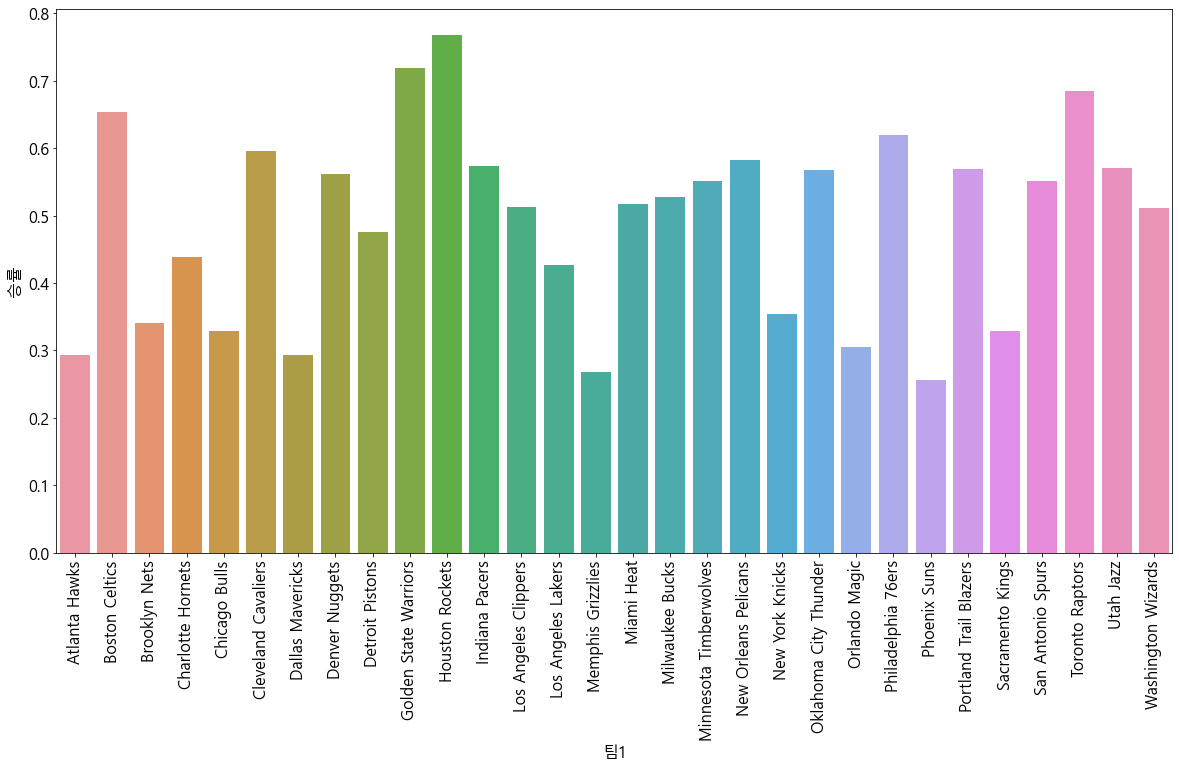

In [105]:
sns.barplot(data=holiday_df, x='팀1', y='승률')
plt.xticks(rotation=90)
plt.show()

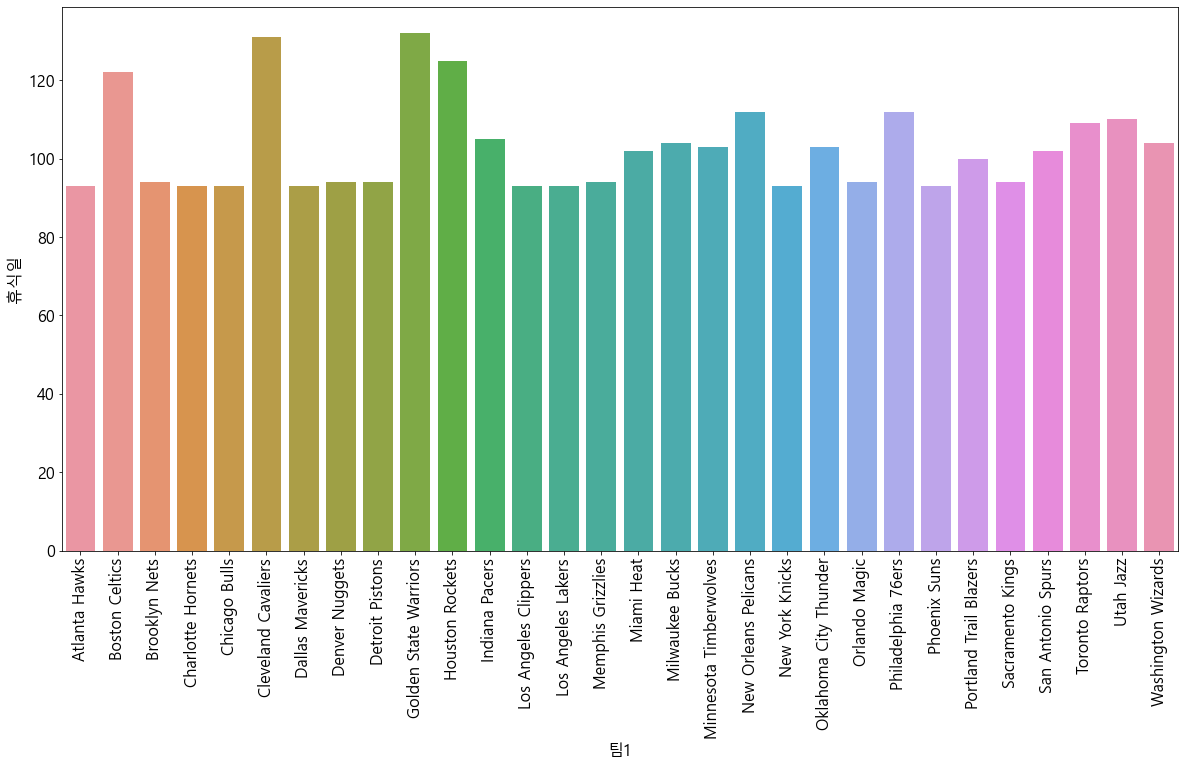

In [107]:
sns.barplot(data=holiday_df, x='팀1', y='휴식일')
plt.xticks(rotation=90)
plt.show()

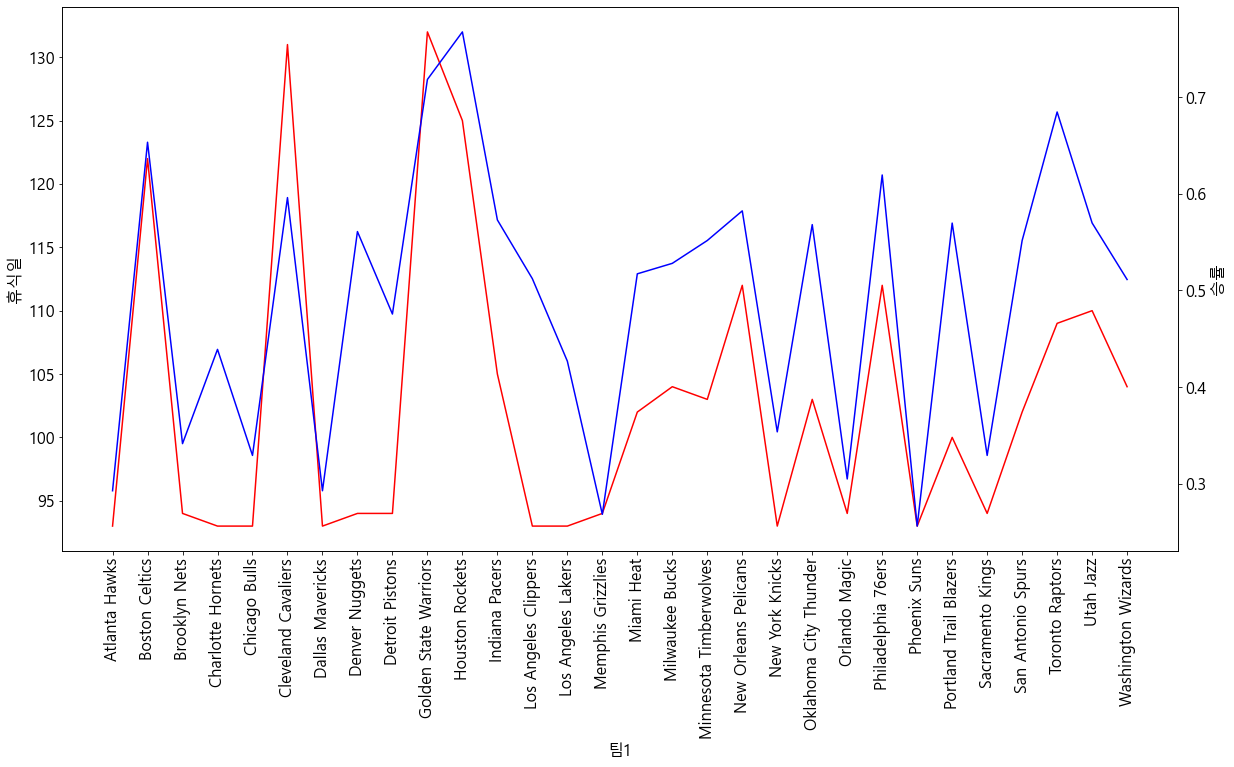

In [112]:
# 승률과 휴식일을 같이 그려서 패턴을 비교해 본다.
fig, ax1 = plt.subplots()
sns.lineplot(data=holiday_df, x='팀1', y='휴식일', color='red', ax=ax1)
plt.xticks(rotation=90)
# 두 그래프로 x축을 고유하도록 한다.
ax2 = ax1.twinx()
sns.lineplot(data=holiday_df, x='팀1', y='승률', color='blue', ax=ax2)
plt.show()

휴식일이 많은 팀은 승률도 높다.